In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('C:\\Users\\SMaruthiSrinivasInte\\Documents\\Ml & AI Study\\DS\\knn-ds.csv')

In [2]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [3]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [5]:
df['Favorite Color']=le.fit_transform(df['Favorite Color'])
df['Favorite Music Genre']=le.fit_transform(df['Favorite Music Genre'])
df['Favorite Beverage']=le.fit_transform(df['Favorite Beverage'])
df['Favorite Soft Drink']=le.fit_transform(df['Favorite Soft Drink'])
df['Gender']=le.fit_transform(df['Gender'])

In [6]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


In [7]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [8]:
core=df.corr()
arr=core["Gender"].sort_values(ascending=False)
arr

Gender                  1.000000
Favorite Soft Drink     0.188510
Favorite Beverage      -0.114119
Favorite Color         -0.115564
Favorite Music Genre   -0.192661
Name: Gender, dtype: float64

In [9]:
arr=['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink']

In [10]:
X=df[arr]
y=df['Gender']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[6 3]
 [5 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.67      0.55      0.60        11

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20

Accuracy: 0.6


In [15]:
print(classifier.score(X,y).round(3))

0.652


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [17]:
log_model = LogisticRegression()
log_model.fit(X, y)
print("Logistic Regression:", log_model.score(X, y).round(3))

# Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)
print("Linear Discriminant Analysis:", lda_model.score(X, y).round(3))

# K-Nearest Neigbors
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
print("K-Nearest Neigbors:", knn_model.score(X, y).round(3))

# Classification and Regression Trees
cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
print("Classification and Regression Trees:", cart_model.score(X, y).round(3))

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X, y)
print("Gaussian Naive Bayes:", gnb_model.score(X, y).round(3))

# Support Vector Machines
svm_model = SVC(gamma = 'auto')
svm_model.fit(X, y)
print("Support Vector Machines:", svm_model.score(X, y).round(3))

# Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
print("Random Forest Classifier:", rfc_model.score(X, y).round(3))

Logistic Regression: 0.606
Linear Discriminant Analysis: 0.591
K-Nearest Neigbors: 0.758
Classification and Regression Trees: 0.955
Gaussian Naive Bayes: 0.621
Support Vector Machines: 0.833
Random Forest Classifier: 0.955


In [18]:

pip install python-graphviz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [19]:
!pip install pydotplus

In [20]:
np_arr=np.array(set(df['Gender']))

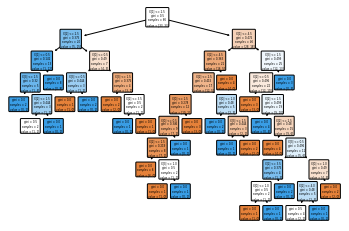

In [27]:
from sklearn import tree
tree.plot_tree(cart_model,filled=True,rounded=True);

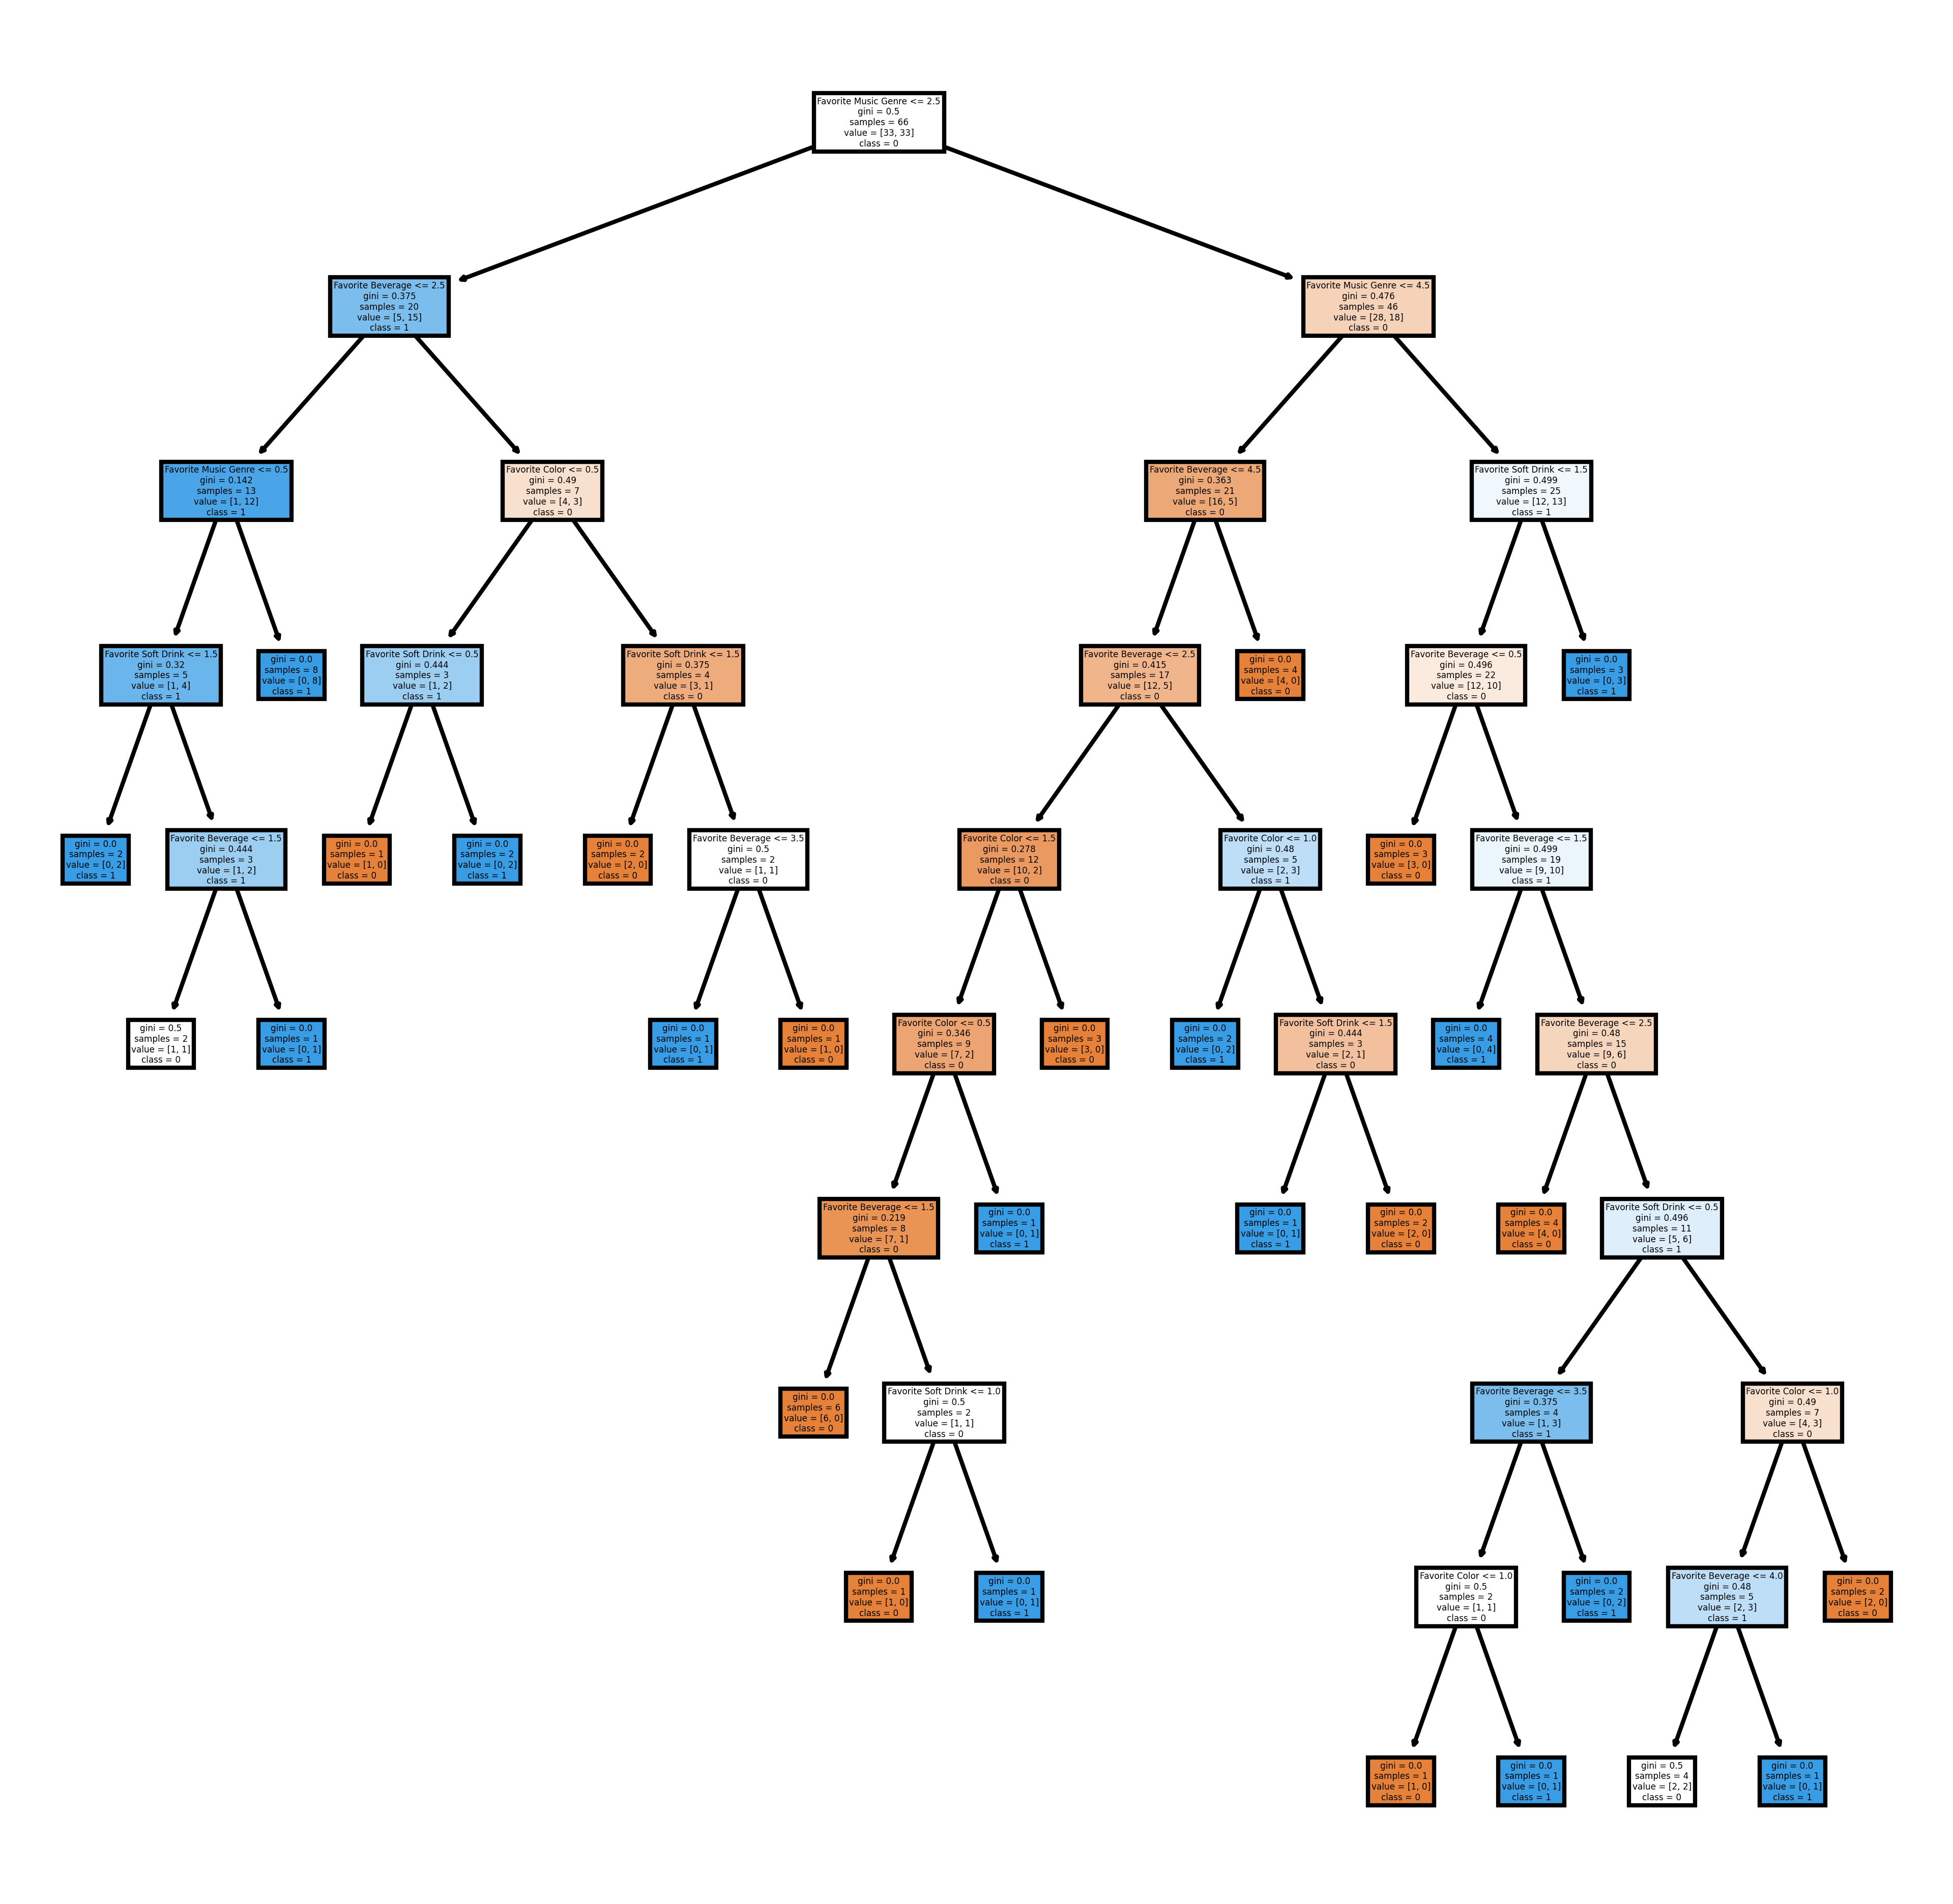

In [38]:
fn=arr
cn=[0,1]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=600)
tree.plot_tree(cart_model,
               feature_names = fn, 
               class_names=['0','1'],
               filled = True);
fig.savefig('imagename.png')